<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
print(data.info())
display(data.head(10))
display(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Вывод

Проблемы в данных:
* преобразовать дату в более удобный формат (оставить только число или добавить новый столбец со сроком продажи квартиры);
* много пропущенных значений в различных столбцах;
* тип переменных в столбцах floors_total, balcony, ponds_around3000 и parks_around3000  следует изменить на целочисленный;
* тип переменных в is_apartment стоит заменить на булевый;

## Предобработка данных

In [2]:
# заменим название столбца cityCenters_nearest:
data = data.rename(columns = {'cityCenters_nearest': 'city_centres_nearest'})
print(data.isna().sum()) #посмотрим общее число пропусков
# удалим строки с пропущенным населенным пунктом (их меньше 1%)
data = data.dropna(subset=['locality_name']).reset_index(drop=True)
# преобразуем столбец с датой 
data['first_day_exposition']= pd.to_datetime(data['first_day_exposition'])

# недостающие значения в столбце с высотой потолоков
# можно заполнить медианными для каждого населенного пункта:

for name in data['locality_name'].unique():
    if data[data['locality_name'] == name]['ceiling_height'].sum() > 0:
        median = data[data['locality_name'] == name]['ceiling_height'].median()
        if pd.isna(median) == False:
            data.loc[(data['locality_name'] == name) & (data['ceiling_height'].isna()), 'ceiling_height'] = median
# для некоторых значений не удалось посчитать медиану,
# заполним их медианным значением по всем городам:
median = data['ceiling_height'].median()
data['ceiling_height'] = data['ceiling_height'].fillna(median)
                                                                          

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centres_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


In [3]:
# пропуски в столбце с количеством балконов можно заполнить нулями:
data['balcony'] = data['balcony'].fillna(0)
# пропуски в столбце is_apartment заполним False,
# тк большинство квартир не являются апартаментами,
# а для тех, которые являются, эти значения наверняка указали:
data['is_apartment'] = data['is_apartment'].fillna(False)

# заполним пропущенные значения для living_area:
for name, group_data in data.groupby('locality_name'):
    if (group_data['living_area'].sum() > 0):
        median = (group_data['living_area']/group_data['total_area']).median()
        data.loc[
        (data['locality_name'] == name) 
        & data['living_area'].isna(), 'living_area'] = median*data[(data['locality_name'] == name) 
        & data['living_area'].isna()]['total_area']
# и аналогично для площади кухни:
    if (group_data['kitchen_area'].sum() > 0):
        median_kitchen = (group_data['kitchen_area']/group_data['total_area']).median()
        data.loc[
        (data['locality_name'] == name) 
        & data['kitchen_area'].isna(), 'kitchen_area'] = median_kitchen*data[(data['locality_name'] == name) 
        & data['kitchen_area'].isna()]['total_area']

# заменим тип данных:
data['balcony'] =data['balcony'].astype(int) # балконов не может быть дробное количество
data['is_apartment'] = data['is_apartment'].astype(bool) # это либо апартаменты, либо нет
data[['floors_total','parks_around3000', 'ponds_around3000']] =\
data[['floors_total','parks_around3000', 'ponds_around3000']].astype('Int64') # этажей, парков и водоемов
                                                                              # не может быть дробное количество

### Вывод

* Мы заполнили пропуски в столбце с количеством балконов нулями.
* Пропуски в столбцах с площадями заполнили значениями медианных метрик.
* Изменили типы данных.

## Расчёты и добавление результатов в таблицу

Добавим в исходную таблицу дополнительные столбцы:

In [5]:
# посчитаем цену квадратного метра:
data['sq_meter_price'] = data['last_price']/data['total_area']
# запишем дни,месяцы и года в разные столбцы:
data['first_day'] = pd.DatetimeIndex(data['first_day_exposition']).weekday
data['first_month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['first_year'] = pd.DatetimeIndex(data['first_day_exposition']).year
# добавим метки к этажам:
data.loc[data['floor'] == data['floors_total'], 'floor_id'] = 'последний'
data.loc[data['floor'] == 1 , 'floor_id'] = 'первый'
data.loc[(data['floor'] != 1 ) & (data['floor'] < data['floors_total']), 'floor_id'] = 'другой'  
data['floor_id'] = data['floor_id'].fillna('первый')
# найдем отношения жилой и кухонной зоны к общему метражу:
data['living_to_total'] = data['living_area']/data['total_area']
data['kitchen_to_total'] = data['kitchen_area']/data['total_area']

### Выводы

* В исходную таблицу был добавлен столбец содержащий стоимость квадратного метра для каждой квартиры;
* добавлены столбцы с номерами месяцев, дней недели и года для каждой квартиры;
* добавлен столбец меток этажей;
* добавлены столбцы отношений жилой и кухонной площадей к общему метражу квартир.

## Исследовательский анализ данных

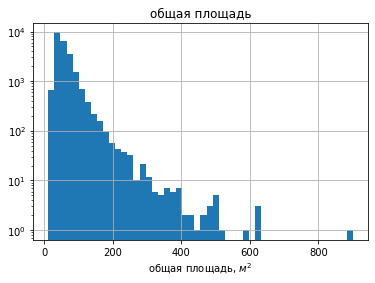

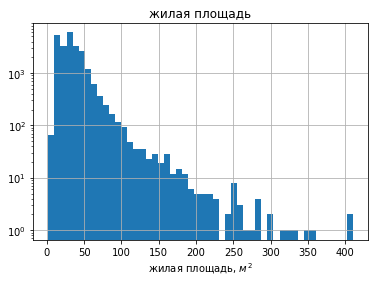

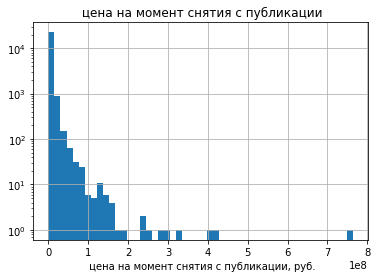

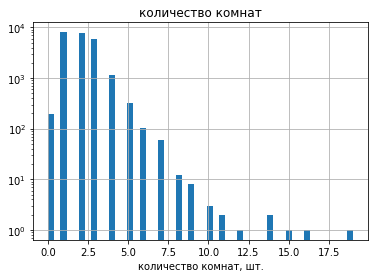

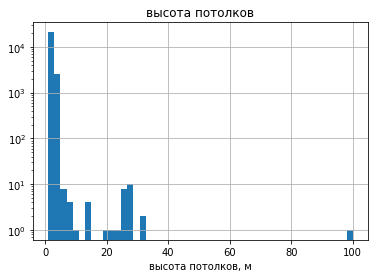

In [6]:
# посмотрим на следующие параметры: площадь, цена, 
# число комнат, высота потолков
list_of_hists = [
                ['total_area', 'общая площадь', r'$м^{2}$'], 
                 ['living_area', 'жилая площадь', r'$м^{2}$'], 
                 ['last_price', ' цена на момент снятия с публикации', 'руб.'],
                 ['rooms', 'количество комнат', 'шт.'], 
                 ['ceiling_height', 'высота потолков', 'м']
                ]
for value in list_of_hists:
    left = data[value[0]].min()
    right = data[value[0]].max()
    data.hist(value[0], bins=50, range=(left, right))
    plt.title(value[1])
    plt.xlabel('{0}, {1}'.format(value[1], value[2]))
    plt.yscale('log')
    
    plt.show()

* Общая площадь:
в данных присутсвует недвижимость с общей площадью  больше 200 кв. м. Скорее всего, это частные дома, но есть и такие, чья площадь значительно выше 400 кв.м -- похоже на выброс. Гистограмма для общей жилой площади имеет довольно много околонулевых значений, при этом минимально возможная жилая площадь по нормам составляет 14 кв. м.
* Цена:
большой пик в нуле, и несколько единичных выбросов с очень большой стоимостью.
* Высота потолков:
присутствуют записи с высотой потолков больше 10 м! При этом СанПин устанавливает минимальную высоту потолков от 2м, а максимальная высота потолков в среднем составляет 3-4 м.

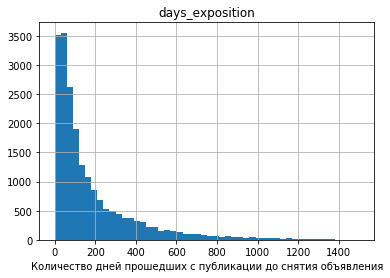

Среднее: 180.7531998045921;
0.25     45.0
0.50     95.0
0.75    231.0
Name: days_exposition, dtype: float64


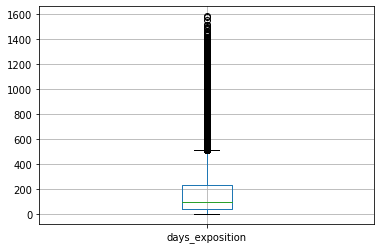

In [7]:
# время продажи квартиры
data.hist('days_exposition', bins=50, range=(0, 1500))
plt.xlabel('Количество дней прошедших с публикации до снятия объявления')
plt.show()
data['days_exposition'].plot(kind='box', grid=True)

print('Среднее: {0};'.format(data['days_exposition'].mean()))
print(data['days_exposition'].quantile([0.25,0.5,0.75]))


В среднем продажа квартиры занимает 180 дней. Если продажа заняла больше 231 дня, можно сказать, что продажи затянулись, а если меньше 45 -- прошли быстрее обычного.

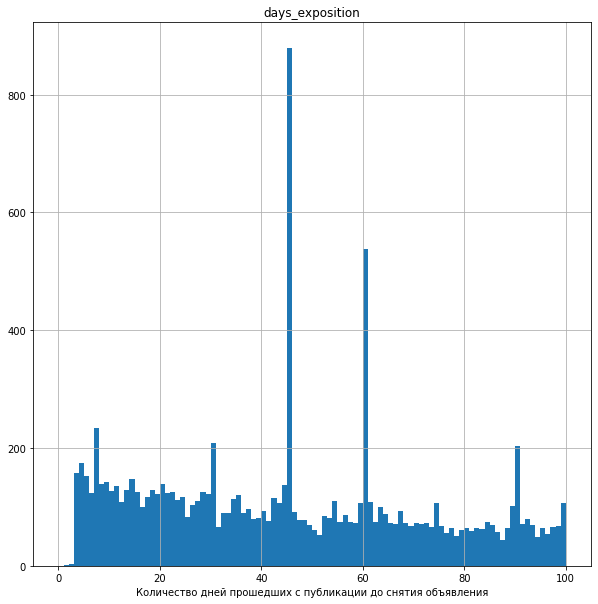

In [8]:
data.query('days_exposition < 200').hist('days_exposition', bins=100, range=(0, 100), figsize=(10, 10))
plt.xlabel('Количество дней прошедших с публикации до снятия объявления')
plt.show()


<div class="alert alert-info">
Выбросы кратны 7, 30, 90 и тд дням. Похоже, они появились из-за того, что days_exposition для них считали  не через разницу даты публикации и даты снятия обявления, а вписывали приблизительные сроки продажи: неделя, месяц, полтора месяца и тд.
</div>

In [9]:
# посмотрим, сколько всего значений выходят за пределы "усов":
border_days = data['days_exposition'].quantile(0.75)+1.5*(
data['days_exposition'].quantile(0.75) - data['days_exposition'].quantile(0.25)
)
print('Число выбросов для коротких усов:',data.query('days_exposition > @border_days')['days_exposition'].count())
# около 7% -- значительно; увеличим усы:
border_days = data['days_exposition'].quantile(0.75)+3*(
data['days_exposition'].quantile(0.75) - data['days_exposition'].quantile(0.25)
)
print('Число выбросов для коротких усов:',data.query('days_exposition > @border_days')['days_exposition'].count())

Число выбросов для коротких усов: 1674
Число выбросов для коротких усов: 615


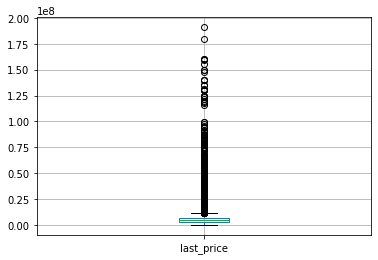

count    2.365000e+04
mean     6.541127e+06
std      1.089640e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64


In [10]:
# посмотрим, как можно почистить данные с ценой: там было несколько единичных выбросов с ценой больше 2Е8
data.query('last_price <= 2e8')['last_price'].plot(kind='box', grid=True)
plt.show()
print(data['last_price'].describe())
# довольно большое отклоенение, посмотрим, сколько значений попадает в расширенный интервал "усов":
border_price = data['last_price'].quantile(0.75)+3*(
data['last_price'].quantile(0.75) - data['last_price'].quantile(0.25)
)
#print(data.query('last_price > @border_price')['last_price'].count())
# 4% процента, в стандартный интервал попадает около 9%,
# значит крайней точкой выберем границу расширенного интервала

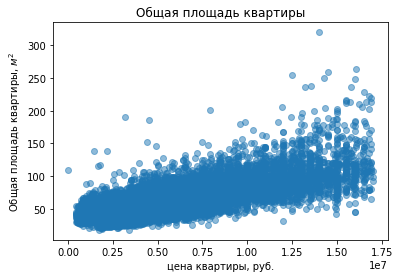

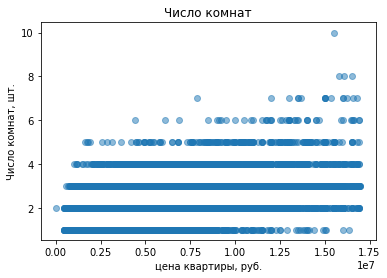

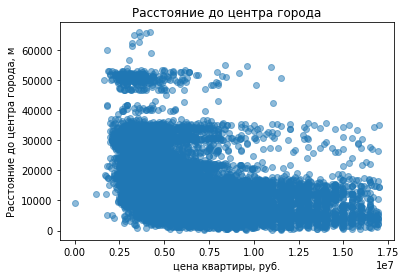

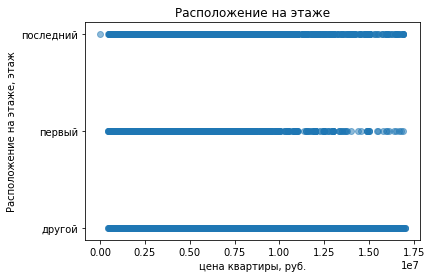

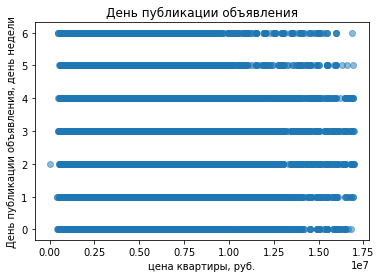

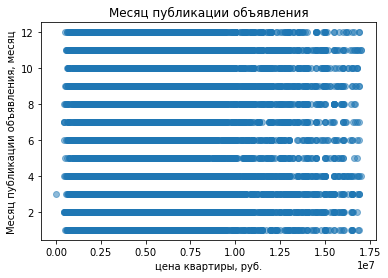

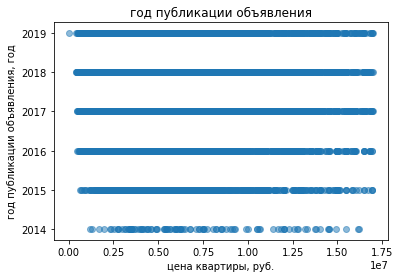

In [11]:
# критерии отбора для "чистых записей":
# total_area < 400;
# living_area > 14 & living_area < 250;
# last_price < border_price;
# ceiling_height <= 5;
clear_data = data.query(
'total_area < 400 & (living_area > 14 & living_area < 250)\
& last_price < @border_price & ceiling_height <= 5 & rooms > 0\
')

# посмотрим, как связана цена с остальными параметрами квартиры:
correlation_list = [['total_area', 'Общая площадь квартиры', r'$м^{2}$'], 
                    ['rooms', 'Число комнат', 'шт.'], 
                    ['city_centres_nearest', 'Расстояние до центра города','м'],
                    ['floor_id', 'Расположение на этаже', 'этаж'], 
                    ['first_day', 'День публикации объявления', 'день недели'],
                    ['first_month', 'Месяц публикации объявления', 'месяц'],
                    ['first_year', 'год публикации объявления', 'год']]
for value in correlation_list:
    plt.scatter(y=clear_data[value[0]],x=clear_data['last_price'], alpha=0.5)
    plt.title(value[1])
    plt.xlabel('цена квартиры, руб.')
    plt.ylabel('{0}, {1}'.format(value[1], value[2]))
    plt.show()    

Выделены следующие зависимости между ценой и другими параметрами квартиры:
* цена прямо зависит от количества комнат и общей площади квартиры;
* чем дальше квартира находится от центра, тем ниже ее стоимость;
* цена квартиры не зависит от даты публикации объявления;
* квартиры на первом этаже немного дешевле остальных;

In [12]:
correlation_list = ['total_area', 'rooms', 'city_centres_nearest',
                    'first_day', 'first_month', 'first_year']
for value in correlation_list:
    print('Коэффициент корреляции для {0}'.format(value))
    print(round(clear_data['last_price'].corr(clear_data[value]),2))
tmp_clear_data = clear_data[['last_price', 'floor_id']].copy()
tmp_clear_data['is_first_floor'] = tmp_clear_data['floor_id'] == 'первый'
print('Корреляция цены с расположением на первом этаже:')
print(round(tmp_clear_data['last_price'].corr(tmp_clear_data['is_first_floor']),2))
tmp_clear_data['is_last_floor'] = tmp_clear_data['floor_id'] == 'последний'
print('Корреляция цены с расположением на последнем этаже:')
print(round(tmp_clear_data['last_price'].corr(tmp_clear_data['is_last_floor']),2))
tmp_clear_data['is_other_floor'] = tmp_clear_data['floor_id'] == 'другой'
print('Корреляция цены с расположением на прочих этажах:')
print(round(tmp_clear_data['last_price'].corr(tmp_clear_data['is_other_floor']),2))

Коэффициент корреляции для total_area
0.76
Коэффициент корреляции для rooms
0.5
Коэффициент корреляции для city_centres_nearest
-0.36
Коэффициент корреляции для first_day
-0.02
Коэффициент корреляции для first_month
0.0
Коэффициент корреляции для first_year
-0.02
Корреляция цены с расположением на первом этаже:
-0.12
Корреляция цены с расположением на последнем этаже:
-0.04
Корреляция цены с расположением на прочих этажах:
0.13


### Выводы:
    
- больше всего цена зависит от площади квартиры и от количества комнат;
- чем дальше от центра расположена квартира, тем меньше ее стоимость;
- корреляция с датой размещения объявления незначительная;
- квартиры на первом этаже немного дешевле расположенных на других этажах;

In [ ]:
Найдем населенные пункты с самым большим количеством объявлений:

In [1]:
popular_cities = clear_data['locality_name'].value_counts()[:10].index.tolist()
popular_stat = clear_data.query('locality_name in @popular_cities').pivot_table(
index='locality_name', values='sq_meter_price'
)
# и посмотрим, где самое дорогое жилье и наоборот:
display(popular_stat.sort_values(by='sq_meter_price', ascending=False))

NameError: name 'clear_data' is not defined

Самые высокие цены за квадратный метр жилья в Петербурге, самые низкие -- в Выборге.

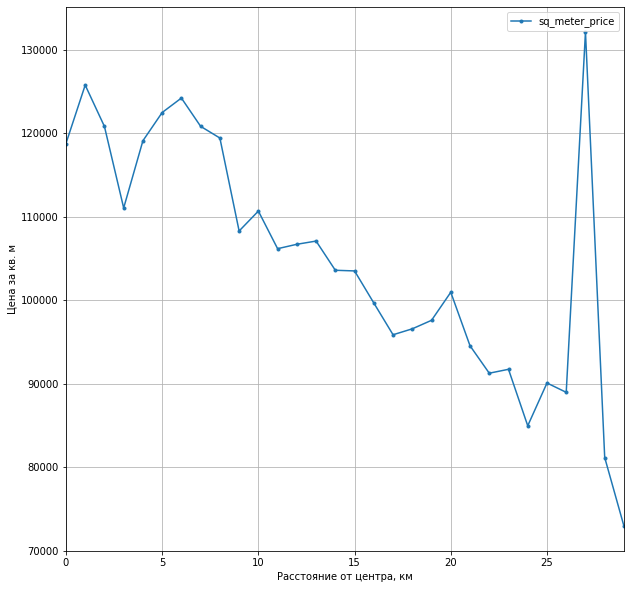

In [14]:
# посмотрим, как зависит цена квартиры в Петербурге в зависимости от удаленности от центра:
data_piter = clear_data.query('locality_name == "Санкт-Петербург"').copy()
data_piter['distance_round'] = round(data_piter['city_centres_nearest']/1000, 0)
data_piter = data_piter.sort_values(by='last_price')
prices = data_piter.pivot_table(index='distance_round', values='sq_meter_price')
prices.plot(y='sq_meter_price', kind='line', style='.-', grid=True, figsize=(10,10))
plt.xlabel('Расстояние от центра, км')
plt.ylabel('Цена за кв. м')
plt.grid(which='major', alpha=10)
plt.show()

График начинает резко убывать в районе отметки 6 км.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


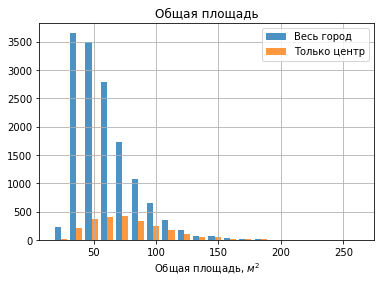

Отношение средних значений для total_area: 1.3
Среднее значение total_area для всего города: 59.0
и центра: 77.85


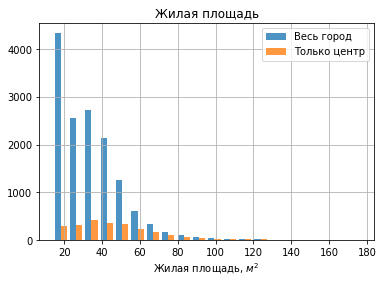

Отношение средних значений для living_area: 1.4
Среднее значение living_area для всего города: 34.06
и центра: 46.58


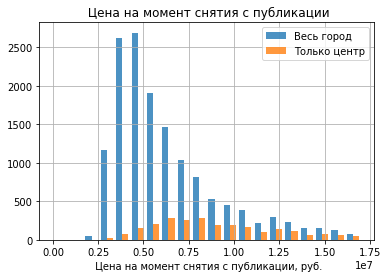

Отношение средних значений для last_price: 1.4
Среднее значение last_price для всего города: 6295250.29
и центра: 8935291.9


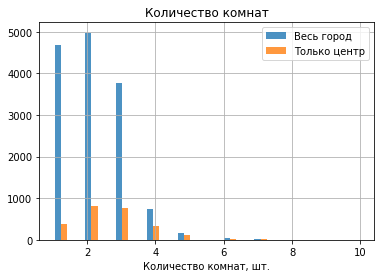

Отношение средних значений для rooms: 1.3
Среднее значение rooms для всего города: 2.09
и центра: 2.66


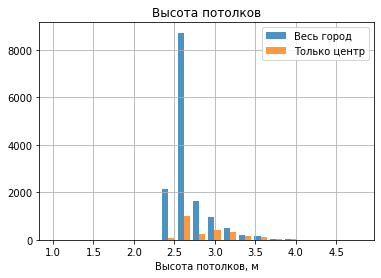

Отношение средних значений для ceiling_height: 1.1
Среднее значение ceiling_height для всего города: 2.72
и центра: 2.94


In [15]:
# посмотрим на цены в центре:
center = 6
list_of_hists = [
                ['total_area', 'Общая площадь', r'$м^{2}$'], 
                 ['living_area', 'Жилая площадь', r'$м^{2}$'], 
                 ['last_price', ' Цена на момент снятия с публикации', 'руб.'],
                 ['rooms', 'Количество комнат', 'шт.'], 
                 ['ceiling_height', 'Высота потолков', 'м']
                ]
piter_center = data_piter.query('distance_round <= @center')
for value in list_of_hists:
    plt.hist(
        [data_piter[value[0]], piter_center[value[0]]],
        bins=20, alpha=0.8, label=['Весь город', 'Только центр']
    )
    plt.grid()
    plt.title(value[1])
    plt.xlabel('{0}, {1}'.format(value[1], value[2]))
    plt.legend(loc='upper right')
    plt.show()
    print('Отношение средних значений для {0}: {1}'.format(value[0],
          round(piter_center[value[0]].mean()/data_piter[value[0]].mean(),1)
    ))
    print('Среднее значение {0} для всего города: {1}\nи центра: {2}'.format(value[0],
          round(data_piter[value[0]].mean(),2), round(piter_center[value[0]].mean(),2)
    ))

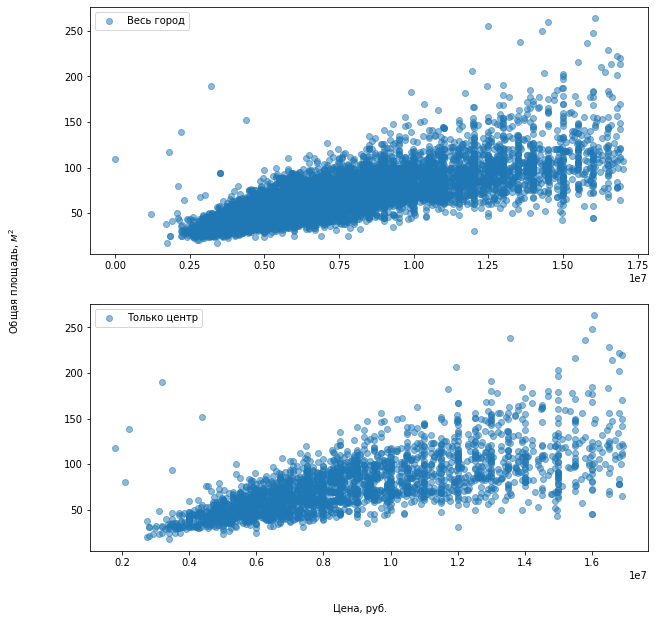

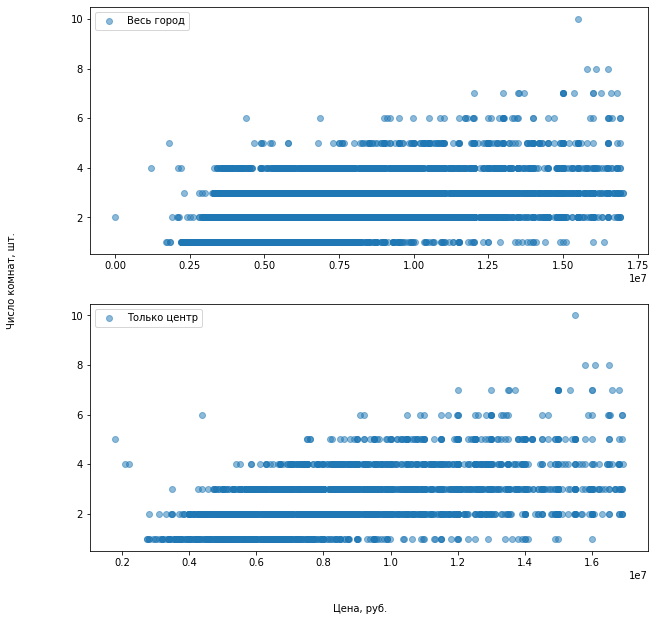

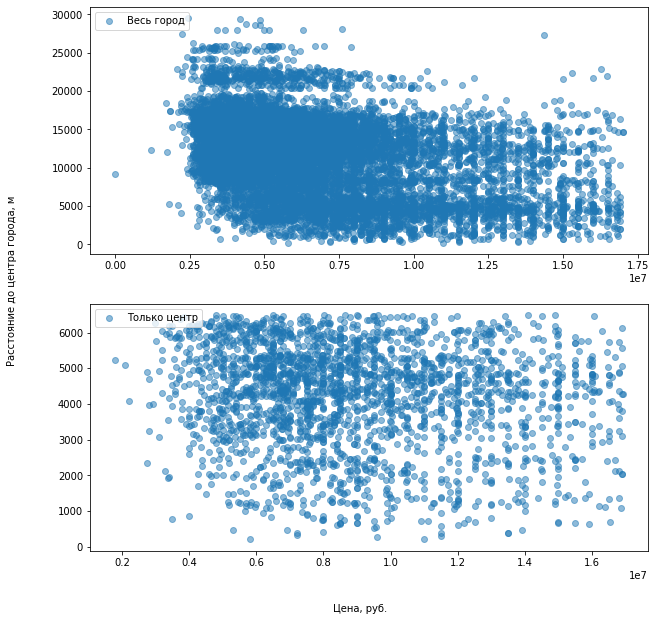

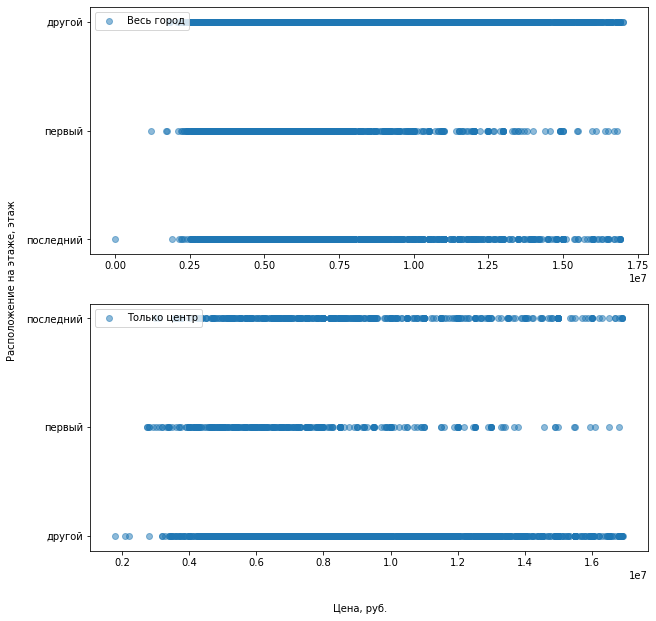

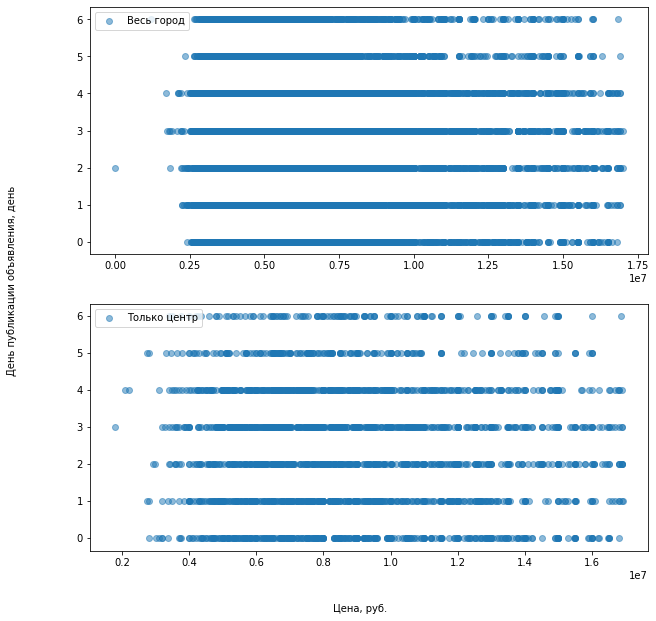

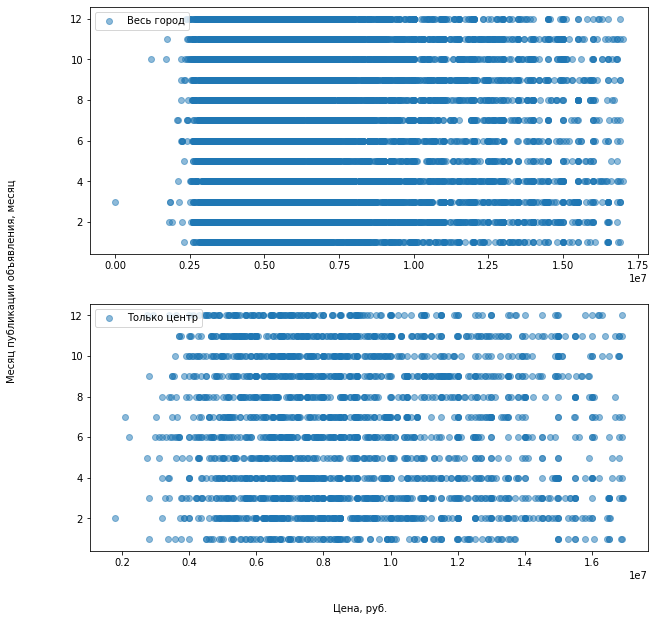

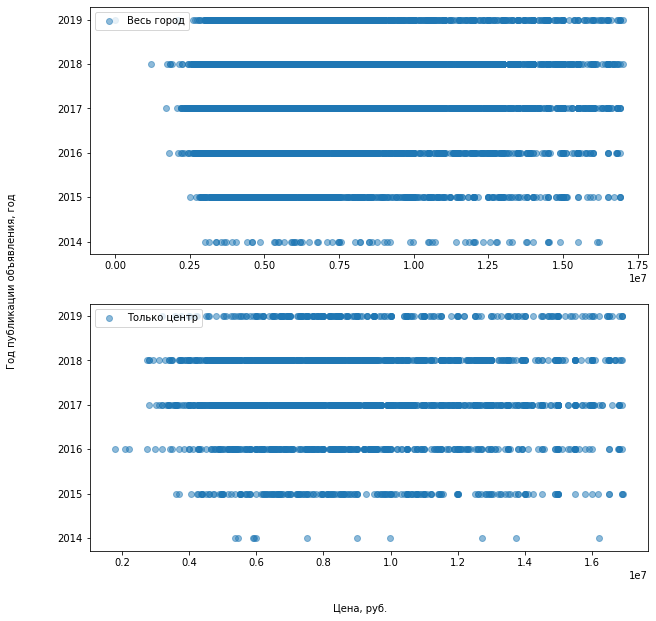

In [16]:
# посмотрим, что влиияет на цену:
correlation_list = [['total_area', 'Общая площадь',  r'$м^{2}$'],
                    ['rooms','Число комнат', 'шт.'],
                    ['city_centres_nearest', 'Расстояние до центра города', 'м'],
                    ['floor_id', 'Расположение на этаже', 'этаж'],
                    ['first_day', 'День публикации объявления', 'день'],
                    ['first_month', 'Месяц публикации объявления', 'месяц'],
                    ['first_year', 'Год публикации объявления', 'год']
                   ]
for value in correlation_list:
    fig, hist = plt.subplots(2)
    
    hist[0].scatter(y=data_piter[value[0]],x=data_piter['last_price'], alpha=0.5,
                    label='Весь город')
    hist[1].scatter(y=piter_center[value[0]],
                          x=piter_center['last_price'], alpha=0.5, 
                    label='Только центр')
    hist[0].legend(loc='upper left')
    hist[1].legend(loc='upper left')
    fig.text(0.5, 0.04, 'Цена, руб.', ha='center')
    fig.text(0.01, 0.5, '{0}, {1}'.format(value[1], value[2]), va='center', rotation='vertical')
    fig.set_figheight(10)
    fig.set_figwidth(10)
    plt.show()    

Цена на квартиры зависит от величины площади, количества комнат и удаленности от центра. Квартиры расположенные в центре имеют в среднем большую площадь (71 кв.м. при среднем значении по городу 59), большее количество комнат (2.47 при среднем по городу 2.09).

## Общий вывод

На основе данных архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет выделялись параметры для определения рыночной стоимости недвижимости.

Исходные данные имели большое количество пропусков, также некоторые столбцы имели некорректные названия. Во время предобработки данных тип значений в некоторых столбцах был изменен с помощью метода astype():
* тип переменных в столбцах floors_total, balcony, ponds_around3000 и parks_around3000 изменен на целочисленный;
* тип переменных в is_apartment заменен на булевый;

Пропуски в данных устранялись различными методами:
* пропущенные значения в столбце balcony заменялись на нули методом fillna: очевидно, что если в квартире нет балкона, то эту графу оставляли пустой;
* пропущенные значения в столбце is_apartment заменялись на False: юридически апартаменты не являются жилым помещением, поэтому, скорее всего, эту графу заполняли только для помещений имеющих оффициальный юридический статус "апартаменты";
* пропущенные значения в столбце ceiling_height заполнялись медианными значениями для населенного пункта, в котором находится продаваемая квартира;
* пропущенные значения в столбцах living_area и kitchen_area заполнялись медианным значением отношения жилой/кухонной зоны к общему метражу квартиры умноженным на общую площадь квартиры, для которой рассчитывается новое значение.

В таблицу были внесены дополнительные столбцы:
* цена квадратного метра;
* число, месяц и год публикации объявления о продаже;
* метки этажа (первый, последний, другой);
* отношения жилой и кухонной площади к общему метражу квартиры;

После предобработки в данных были найдены артефакты:
* в данных присутсвует недвижимость с общей площадью больше 400 кв. м;
* распределение общей жилой площади имеет довольно много околонулевых значений, при этом минимально возможная жилая площадь по нормам составляет 14 кв. м.
* распределение по ценам имеет несколько единичных выбросов с очень большой стоимостью.
* присутствуют записи с высотой потолков больше 10 м, при этом СанПин устанавливает минимальную высоту потолков от 2м, а максимальная высота потолков в среднем составляет 3-4 м.

Для дальнейшего анализа выбирались записи отвечающие следующим условиям:
* общая площадь квартиры не превышает 400 кв. м.;
* жилая площадь квартиры лежит в диапазоне от 14 до 250 кв.м.;
* выбросы цены определялись с помощью диаграммы размаха: все значения лежащие за пределами 3*IQR признаются выбросами (3*IQR = 16996000 руб.);
* высота потолков не превышает 5м;

Анализ новой выборки показал, что больше всего на стоимость квартиры влияют общая площадь, количество комнат и ее расположение; цена квартиры не зависит от даты публикации объявления, квартиры расположенные на первом и последнем этажах немного дешевле остальных. Также выяснилось, что среди десяти городов с наибольшим числом объявлений о продаже квартир лидером цен является Санкт-Петербург. 

Для Санк-Петербурга сравнивались цены на квартиры в зависимости от удаленности от центра. Оценка стоимости квадратного метра жилья в зависимости от удаленности квартиры от центра города показала, что после отметки в 9 км от центра цены резко падают на 10%. Таким образом был выделен сегмент квартир расположенных в центре города. Для них были построены гисторгаммы распределения общей и жилой площади, высоты потолков и количества комнат. Распределения этих параметров в целом совпадают с соответвующими распределениями для всего города, однако квартиры расположенные в центре имею в среднем большую площадь (71 кв.м. для среднего значения по городу 59), большее количество комнат (2.47 для среднего по городу 2.09). Зависимость цены от других параметров совпадает с результатами полученными для всей выборки: сильно влияющими фактроми являются величины площади квартиры, количества комнат и удаленности от центра, квартиры на первом этаже немного дешевле остальных.




